In [1]:
import pymonntorch as pmt
import torch
# import matplotlib.pyplot as plt

In [2]:
from timeresolution import Timeresolution
from current import ConstanceCurrent,UniformCurrent
from lif import LIF
from synapse_group import FullConnectivityFirstOption, FullConnectivitySecondOption, Scaling, FixedAAndFinite
from dandrite import Dandrite
from populationactivity import PopulationActivity
from encoding import TimeToFirstSpike, NumericalCoding, PoissonDistribution
from learning_rule import STDP, RSTDP
from count_spikes import CountSpikes
from plot import print_plot
from read_image import GetImage

In [3]:
data1 = torch.tensor([[1, 2, 3, 4]])

In [4]:
data2 = torch.tensor([1])

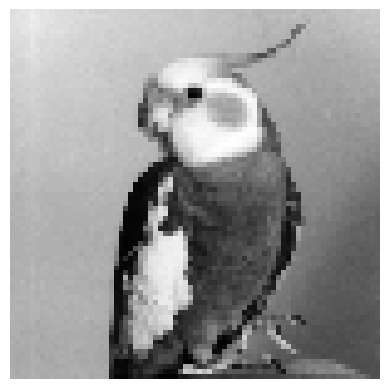

tensor([[192, 184, 177, 171, 169, 163, 158, 152, 155, 160, 180, 175, 169, 162,
         189, 167, 129, 144, 142, 147, 173, 167, 165, 137,  95, 147, 205, 141,
         136, 140, 169, 162, 160, 157, 175, 205, 204, 134, 128, 125, 159, 158,
         156, 100,  67,  99,  98,  60, 120, 112, 154, 149, 148,  18,  43,  51,
          61,  43, 112,  95, 151, 147, 146,  92, 199,  53,  78,  29,  98,  84,
         150, 148, 144, 156, 180,  52,  68, 105,  84,  81, 148, 147, 146, 152,
          60,  98,  92,  91,  77,  75, 145, 146, 141,  57,  47,  66,  94,  77,
          95,  73]], dtype=torch.uint8)

In [5]:
data3 = torch.tensor([GetImage(image_address="birdthumb.png", prefix='./images/')])
data3

In [6]:
def SimulationTTFS(model=LIF(tau=10,
                    R=1.5,
                    u_rest=-67,
                    u_reset=-75,
                    threshold=-55,
                    ratio=1), 
            current=ConstanceCurrent(current=0), 
            dt = 1, 
            PLT = True,
            iteration_num = 10,
            connection_pattern = FullConnectivityFirstOption(J0=0), 
            input_data = data1,
            input_time = 10
            ):
    
        size = input_data.shape[1]
                        
        net1 = pmt.Network(behavior = {1: Timeresolution(dt = dt)} )
        
        pop1 = pmt.NeuronGroup(size = size,
                                net = net1,
                                behavior = {
                                        4 : current,
                                        5 : Dandrite(),
                                        6 : model,
                                        7 : TimeToFirstSpike(time = input_time, data=input_data),
                                        8 : PopulationActivity(),
                                        13 : pmt.Recorder(variables=["u","I","w","T"],tag="ng1_rec"),
                                        14 : pmt.EventRecorder( variables=["spike"],tag="ng1_even"),
                                        })
        
        syn_inside_ng = pmt.SynapseGroup(tag="synaps_inside_neurongroup",
                                        net= net1,
                                        src= pop1,
                                        dst= pop1,
                                        behavior={4: connection_pattern})
        
        net1.initialize()
        net1.simulate_iterations(iteration_num)
 
        if PLT: print_plot(net1,ngs=[pop1])

        
        return net1

Network['Network_1', 'Network'](Neurons: tensor(4)|1 groups, Synapses: tensor(16)|1 groups){1:Timeresolution(dt=1,)}
NeuronGroup['NeuronGroup_1', 'NeuronGroup', 'ng'](4){4:ConstanceCurrent(current=0,)5:Dandrite()6:LIF(tau=10,R=1.5,u_rest=-67,u_reset=-75,threshold=-55,ratio=1,)7:TimeToFirstSpike(time=10,data=tensor([[1, 2, 3, 4]]),)8:PopulationActivity()13:Recorder(variables=['u', 'I', 'w', 'T'],gap_width=0,max_length=None,auto_annotate=True,tag=ng1_rec,)14:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng1_even,)}
SynapseGroup['synaps_inside_neurongroup', 'SynapseGroup', 'syn', 'NeuronGroup_1 => NeuronGroup_1'](S4xD4){4:FullConnectivityFirstOption(J0=0,),}
10xBatch: 1/1 (100%) 7.977ms


/Users/delaram/Me/university/term 8/NS/homework/HW3/codes_of_project_3/dandrite.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ng.I = torch.tensor(ng.I_inp)
/Users/delaram/Me/university/term 8/NS/homework/HW3/codes_of_project_3/encoding.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.data = torch.tensor(self.parameter("data", required=True))
/Users/delaram/Me/university/term 8/NS/homework/HW3/codes_of_project_3/dandrite.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ng.I = torch.tensor(ng.I_inp)


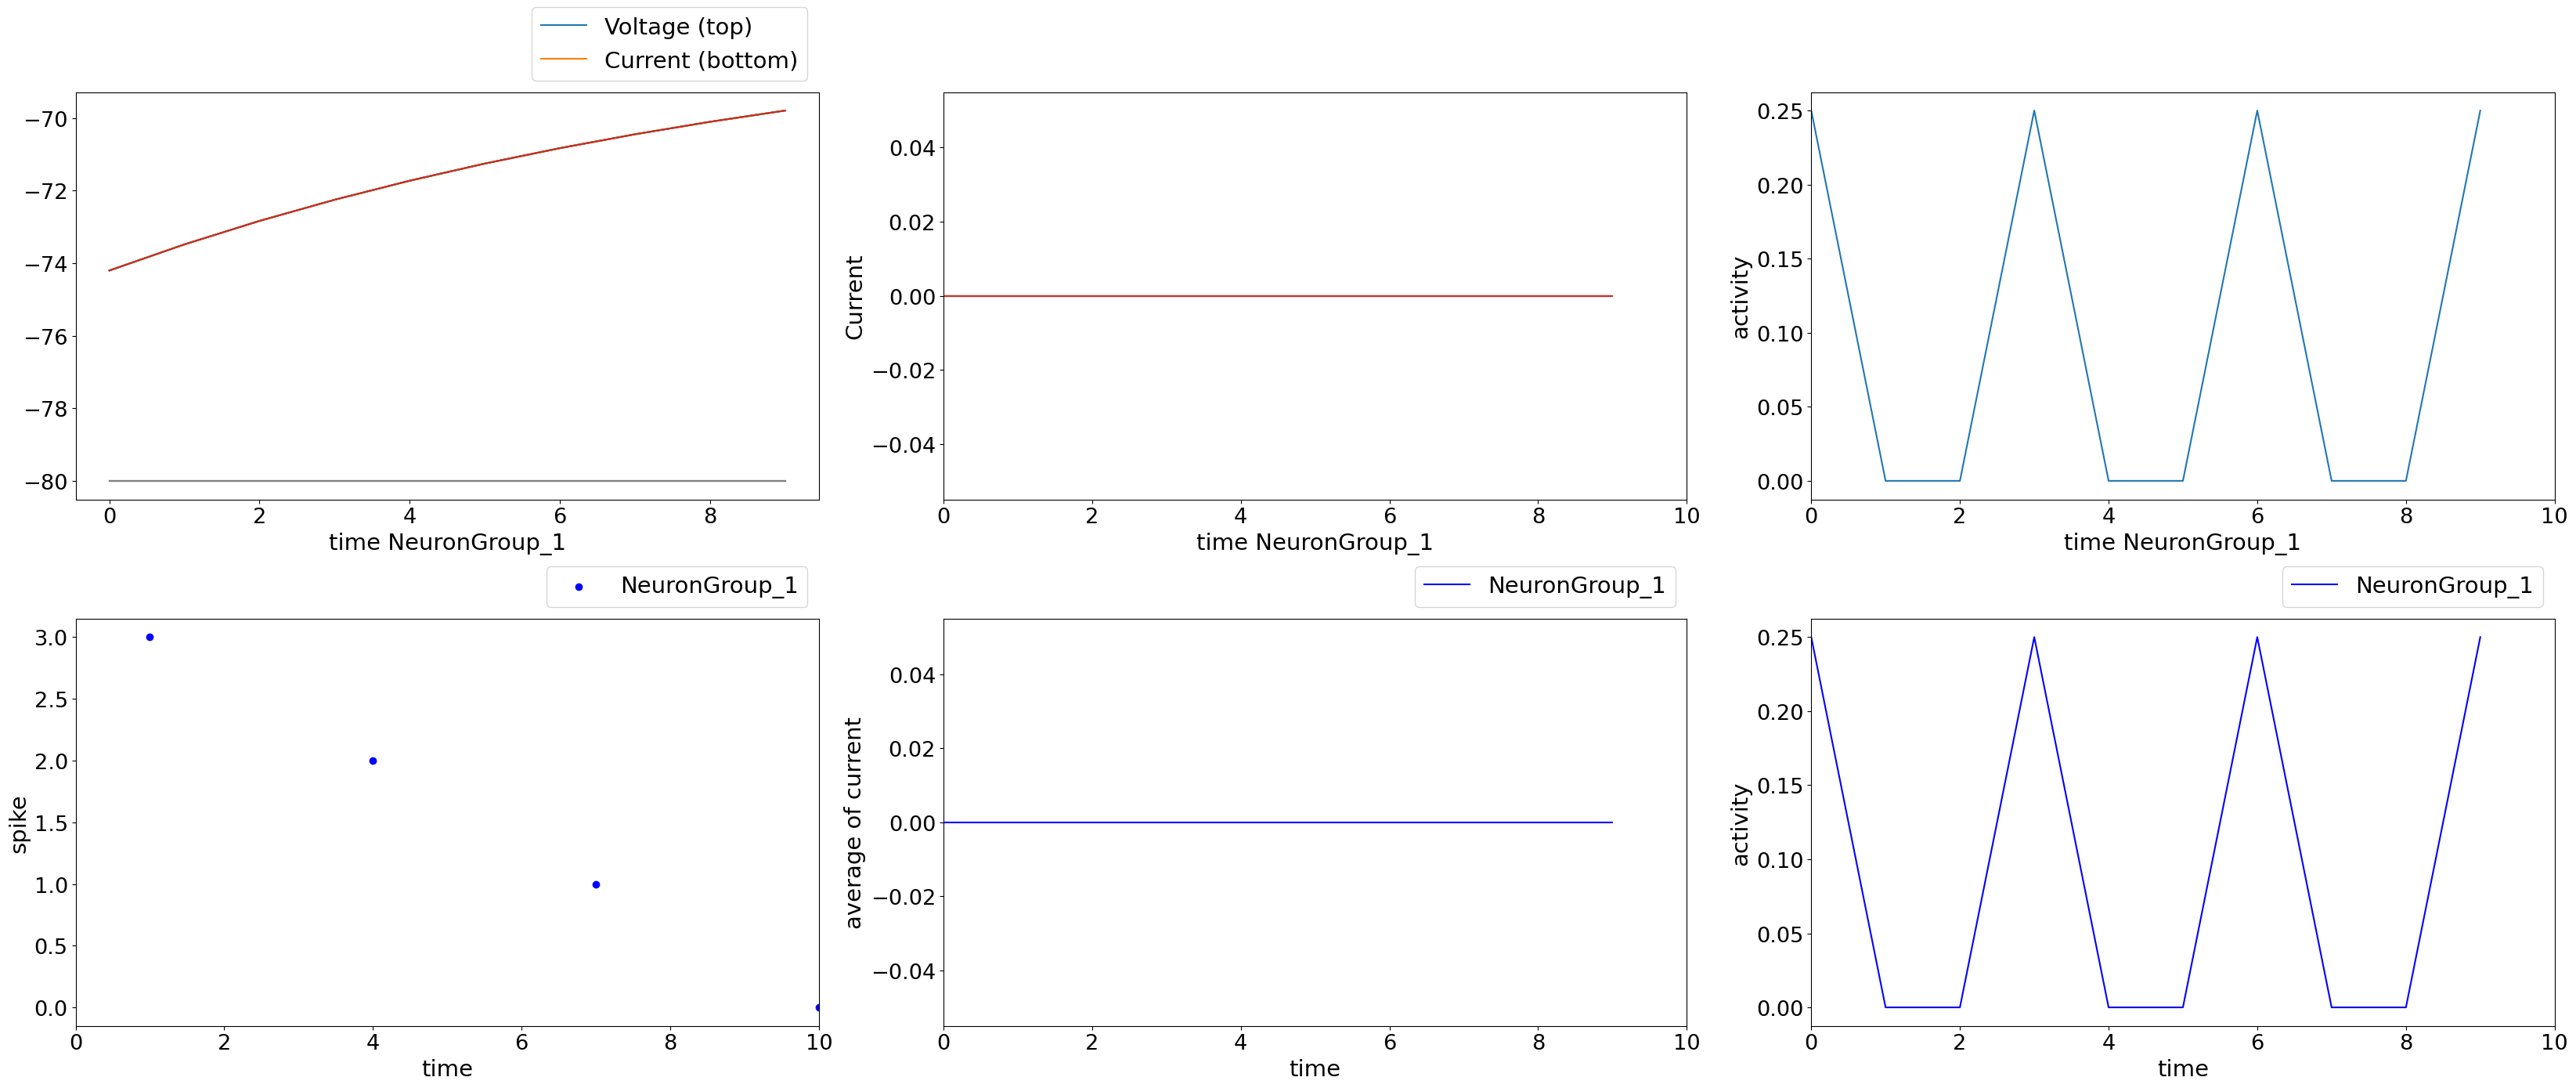

Network['Network_1', 'Network'](Neurons: tensor(4)|1 groups, Synapses: tensor(16)|1 groups){1:Timeresolution(dt=1,)}
NeuronGroup['NeuronGroup_1', 'NeuronGroup', 'ng'](4){4:ConstanceCurrent(current=0,)5:Dandrite()6:LIF(tau=10,R=1.5,u_rest=-67,u_reset=-75,threshold=-55,ratio=1,)7:TimeToFirstSpike(time=10,data=tensor([[1, 2, 3, 4]]),)8:PopulationActivity()13:Recorder(variables=['u', 'I', 'w', 'T'],gap_width=0,max_length=None,auto_annotate=True,tag=ng1_rec,)14:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng1_even,)}
SynapseGroup['synaps_inside_neurongroup', 'SynapseGroup', 'syn', 'NeuronGroup_1 => NeuronGroup_1'](S4xD4){4:FullConnectivityFirstOption(J0=0,),}

In [7]:
SimulationTTFS()

Network['Network_1', 'Network'](Neurons: tensor(100)|1 groups, Synapses: tensor(10000)|1 groups){1:Timeresolution(dt=1,)}
NeuronGroup['NeuronGroup_1', 'NeuronGroup', 'ng'](100){4:ConstanceCurrent(current=0,)5:Dandrite()6:LIF(tau=10,R=1.5,u_rest=-67,u_reset=-75,threshold=-55,ratio=1,)7:TimeToFirstSpike(time=10,data=tensor([[192, 184, 177, 171, 169, 163, 158, 152, 155, 160, 180, 175, 169, 162,
         189, 167, 129, 144, 142, 147, 173, 167, 165, 137,  95, 147, 205, 141,
         136, 140, 169, 162, 160, 157, 175, 205, 204, 134, 128, 125, 159, 158,
         156, 100,  67,  99,  98,  60, 120, 112, 154, 149, 148,  18,  43,  51,
          61,  43, 112,  95, 151, 147, 146,  92, 199,  53,  78,  29,  98,  84,
         150, 148, 144, 156, 180,  52,  68, 105,  84,  81, 148, 147, 146, 152,
          60,  98,  92,  91,  77,  75, 145, 146, 141,  57,  47,  66,  94,  77,
          95,  73]], dtype=torch.uint8),)8:PopulationActivity()13:Recorder(variables=['u', 'I', 'w', 'T'],gap_width=0,max_length=No

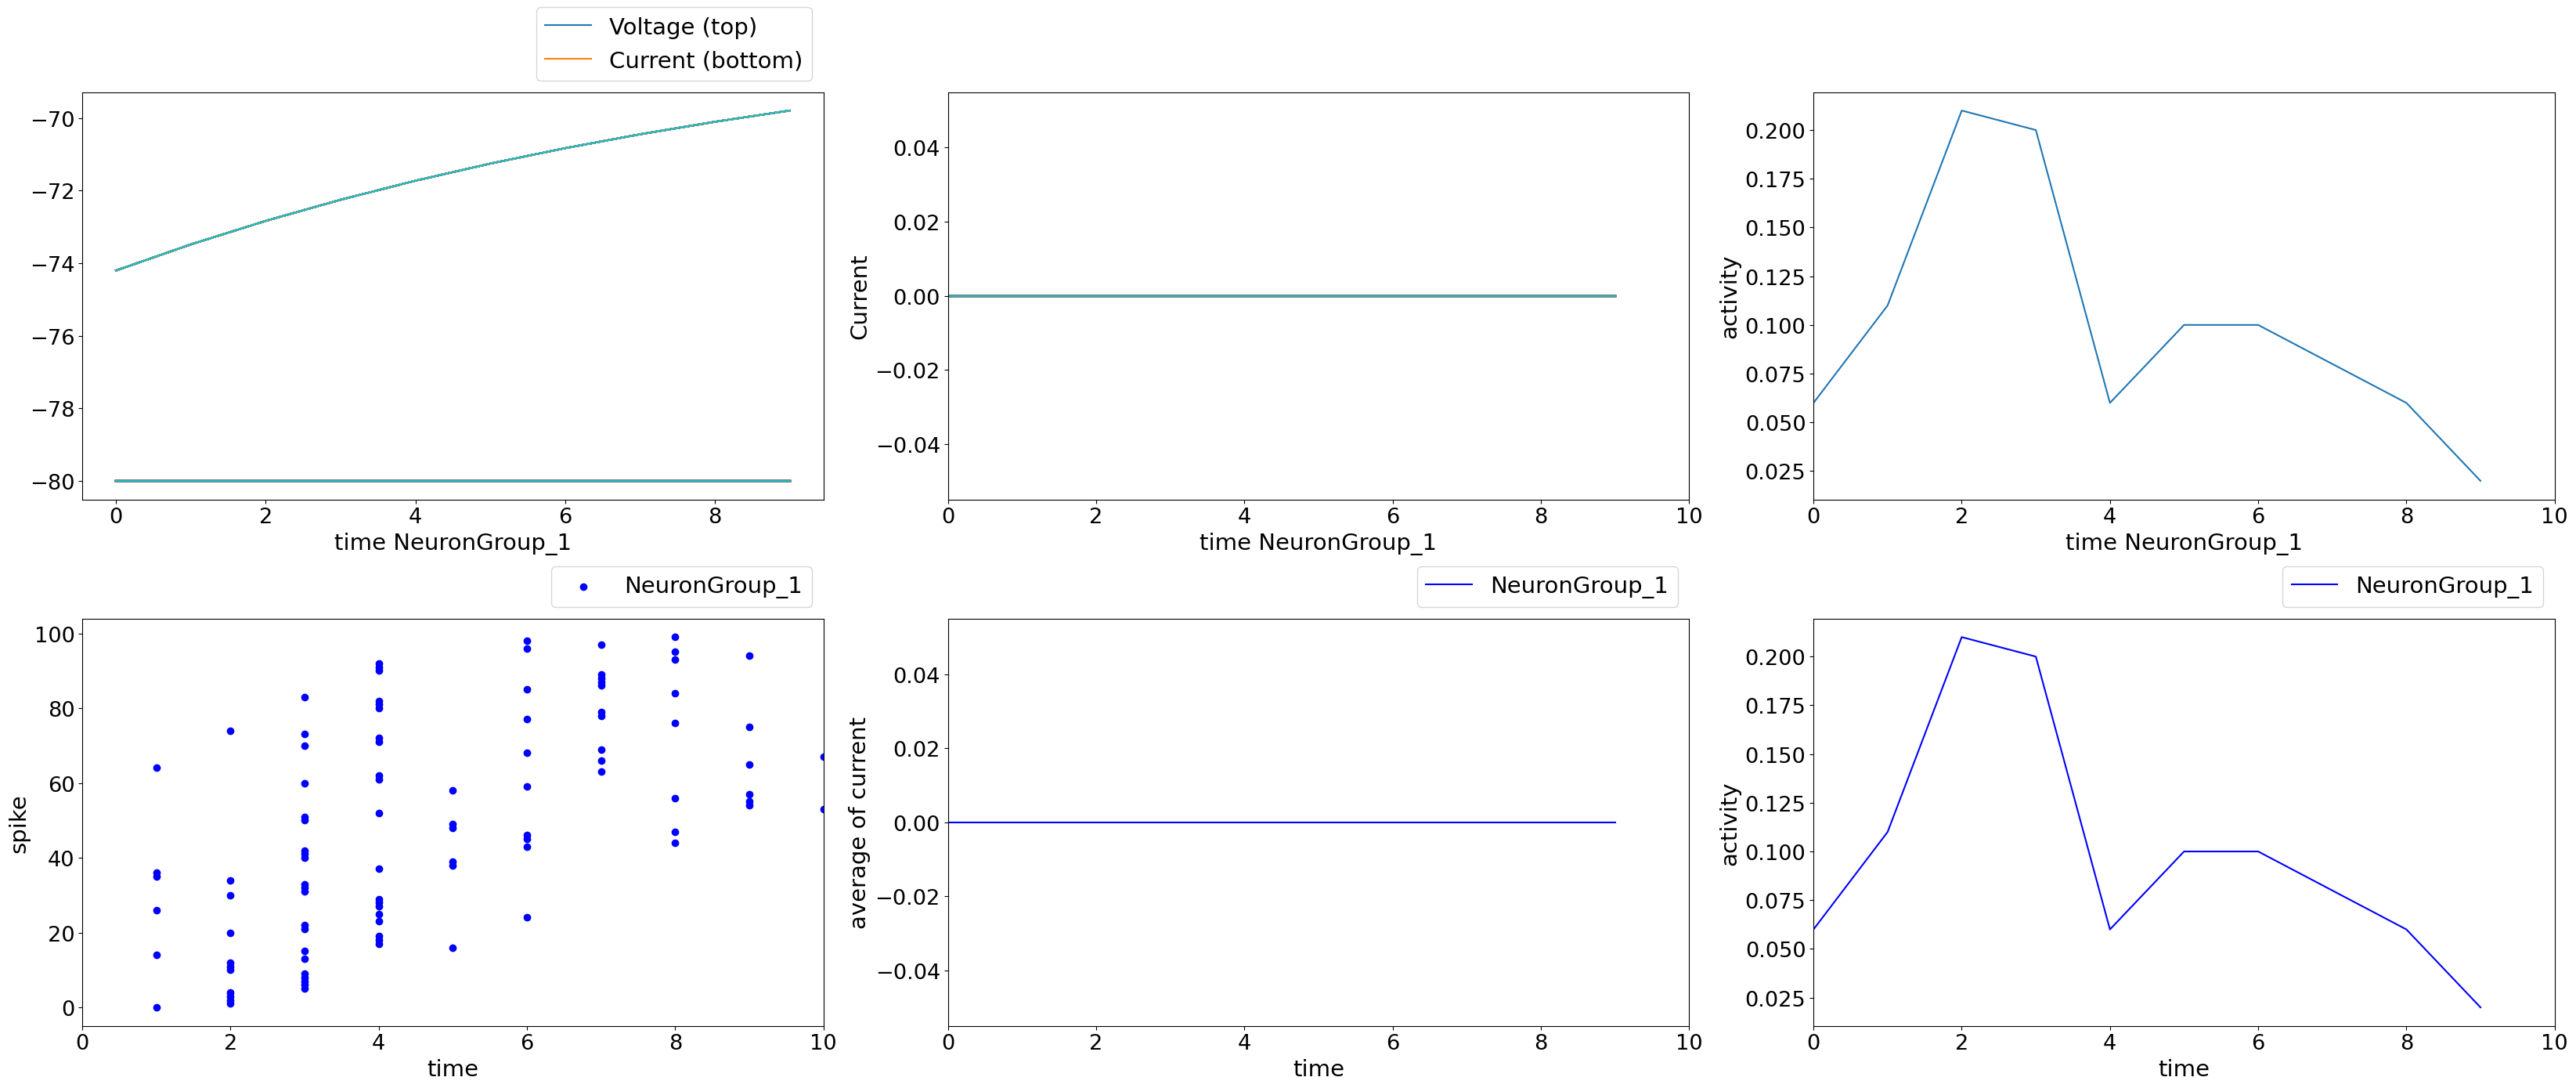

Network['Network_1', 'Network'](Neurons: tensor(100)|1 groups, Synapses: tensor(10000)|1 groups){1:Timeresolution(dt=1,)}
NeuronGroup['NeuronGroup_1', 'NeuronGroup', 'ng'](100){4:ConstanceCurrent(current=0,)5:Dandrite()6:LIF(tau=10,R=1.5,u_rest=-67,u_reset=-75,threshold=-55,ratio=1,)7:TimeToFirstSpike(time=10,data=tensor([[192, 184, 177, 171, 169, 163, 158, 152, 155, 160, 180, 175, 169, 162,
         189, 167, 129, 144, 142, 147, 173, 167, 165, 137,  95, 147, 205, 141,
         136, 140, 169, 162, 160, 157, 175, 205, 204, 134, 128, 125, 159, 158,
         156, 100,  67,  99,  98,  60, 120, 112, 154, 149, 148,  18,  43,  51,
          61,  43, 112,  95, 151, 147, 146,  92, 199,  53,  78,  29,  98,  84,
         150, 148, 144, 156, 180,  52,  68, 105,  84,  81, 148, 147, 146, 152,
          60,  98,  92,  91,  77,  75, 145, 146, 141,  57,  47,  66,  94,  77,
          95,  73]], dtype=torch.uint8),)8:PopulationActivity()13:Recorder(variables=['u', 'I', 'w', 'T'],gap_width=0,max_length=No

In [8]:
SimulationTTFS(model=LIF(tau=10,
                    R=1.5,
                    u_rest=-67,
                    u_reset=-75,
                    threshold=-55,
                    ratio=1), 
            current=ConstanceCurrent(current=0), 
            dt = 1, 
            PLT = True,
            iteration_num = 10,
            connection_pattern = FullConnectivityFirstOption(J0=0), 
            input_data = data3,
            input_time = 10
            )

Network['Network_1', 'Network'](Neurons: tensor(100)|1 groups, Synapses: tensor(10000)|1 groups){1:Timeresolution(dt=1,)}
NeuronGroup['NeuronGroup_1', 'NeuronGroup', 'ng'](100){4:ConstanceCurrent(current=0,)5:Dandrite()6:LIF(tau=10,R=1.5,u_rest=-67,u_reset=-75,threshold=-55,ratio=1,)7:TimeToFirstSpike(time=5,data=tensor([[192, 184, 177, 171, 169, 163, 158, 152, 155, 160, 180, 175, 169, 162,
         189, 167, 129, 144, 142, 147, 173, 167, 165, 137,  95, 147, 205, 141,
         136, 140, 169, 162, 160, 157, 175, 205, 204, 134, 128, 125, 159, 158,
         156, 100,  67,  99,  98,  60, 120, 112, 154, 149, 148,  18,  43,  51,
          61,  43, 112,  95, 151, 147, 146,  92, 199,  53,  78,  29,  98,  84,
         150, 148, 144, 156, 180,  52,  68, 105,  84,  81, 148, 147, 146, 152,
          60,  98,  92,  91,  77,  75, 145, 146, 141,  57,  47,  66,  94,  77,
          95,  73]], dtype=torch.uint8),)8:PopulationActivity()13:Recorder(variables=['u', 'I', 'w', 'T'],gap_width=0,max_length=Non

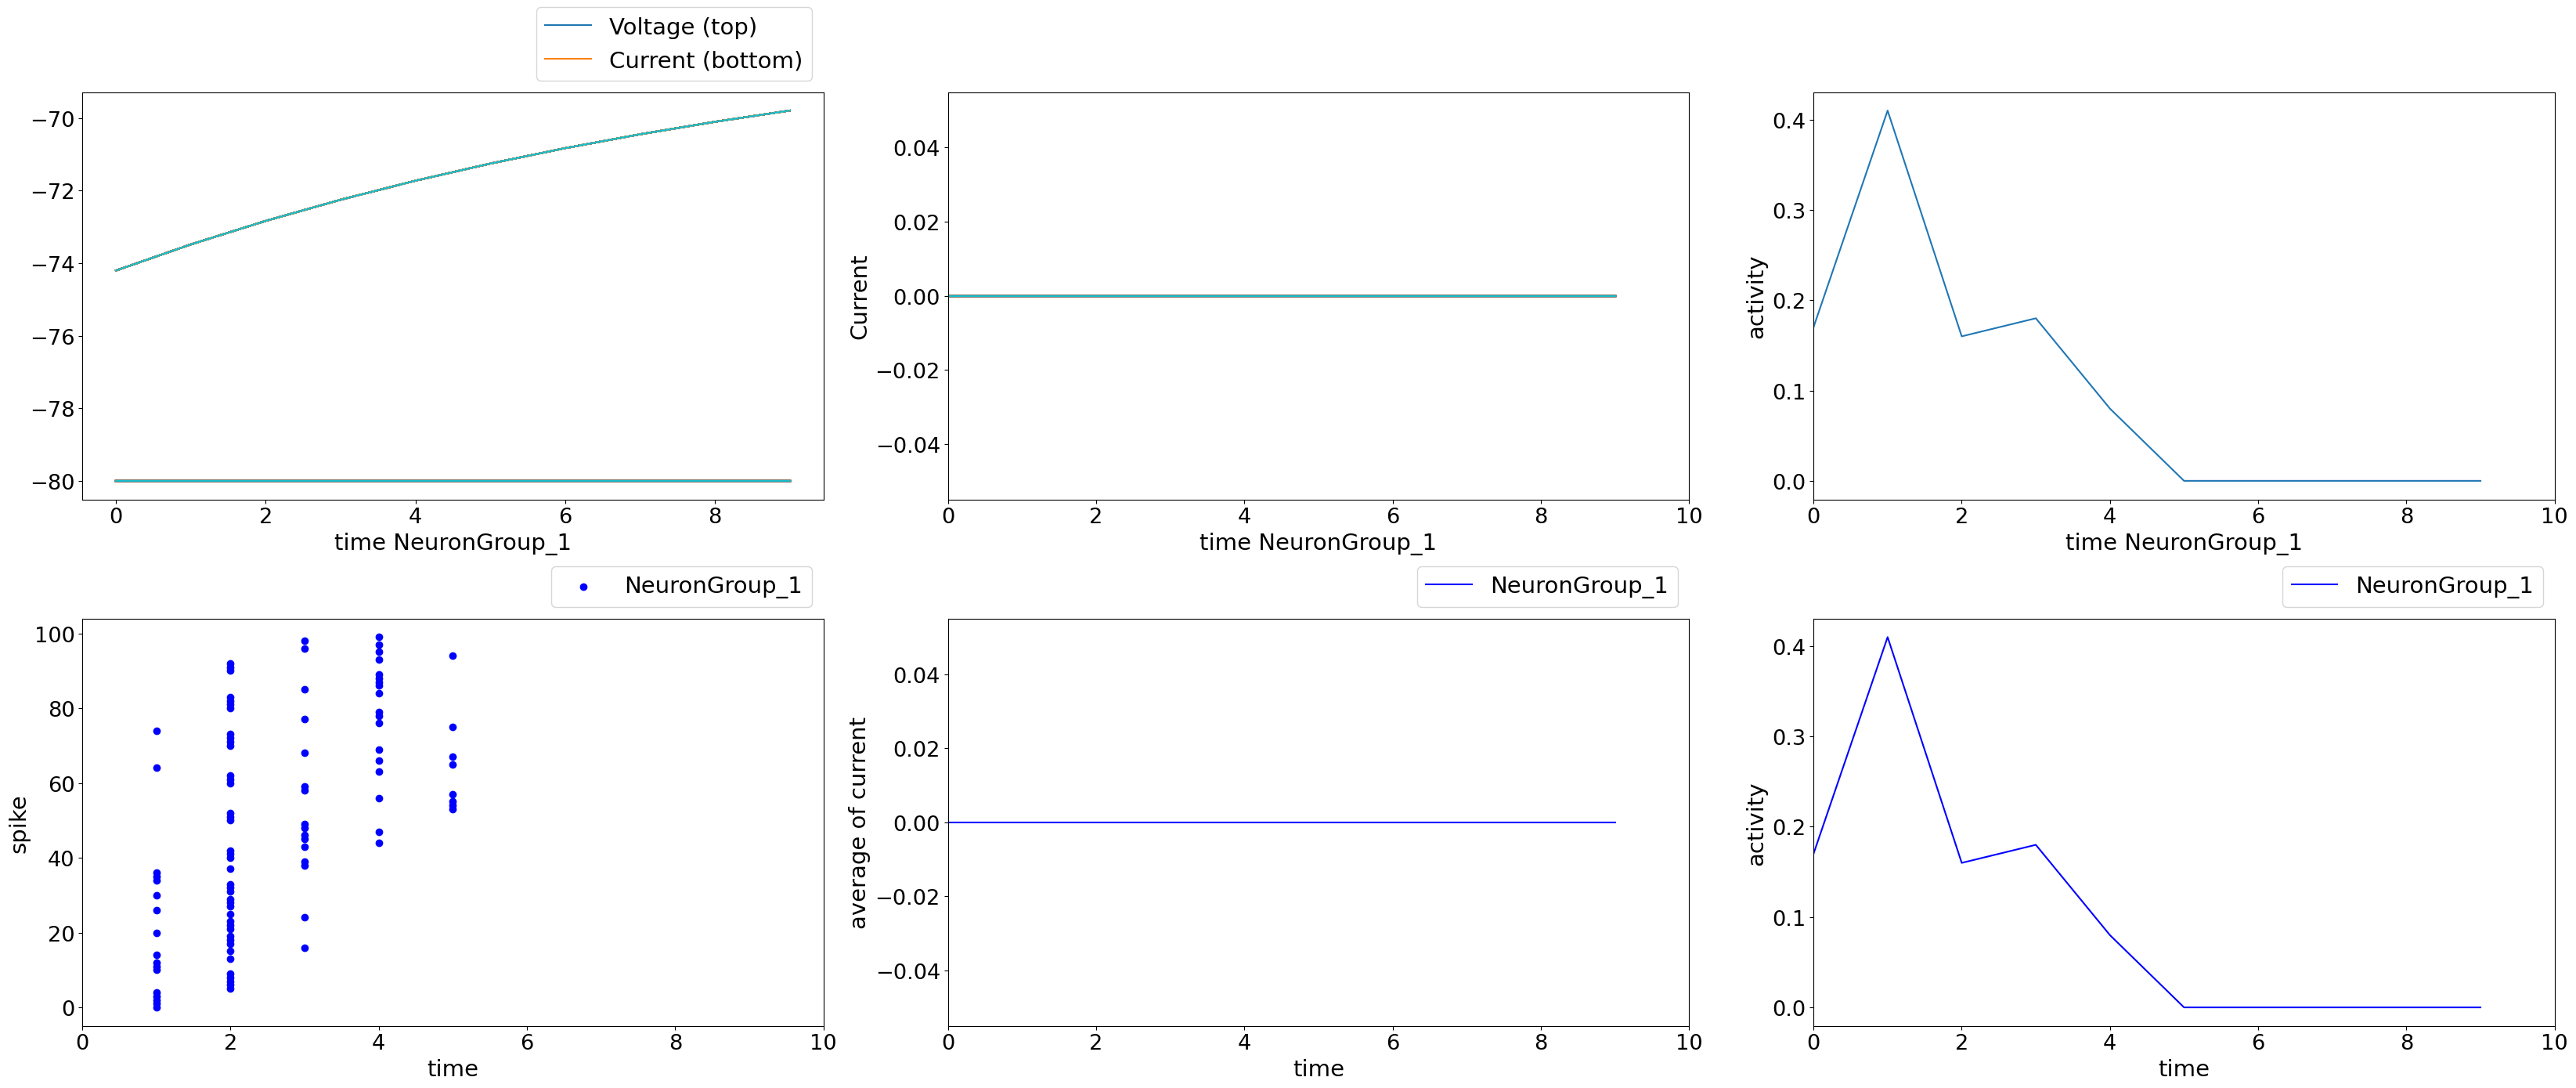

Network['Network_1', 'Network'](Neurons: tensor(100)|1 groups, Synapses: tensor(10000)|1 groups){1:Timeresolution(dt=1,)}
NeuronGroup['NeuronGroup_1', 'NeuronGroup', 'ng'](100){4:ConstanceCurrent(current=0,)5:Dandrite()6:LIF(tau=10,R=1.5,u_rest=-67,u_reset=-75,threshold=-55,ratio=1,)7:TimeToFirstSpike(time=5,data=tensor([[192, 184, 177, 171, 169, 163, 158, 152, 155, 160, 180, 175, 169, 162,
         189, 167, 129, 144, 142, 147, 173, 167, 165, 137,  95, 147, 205, 141,
         136, 140, 169, 162, 160, 157, 175, 205, 204, 134, 128, 125, 159, 158,
         156, 100,  67,  99,  98,  60, 120, 112, 154, 149, 148,  18,  43,  51,
          61,  43, 112,  95, 151, 147, 146,  92, 199,  53,  78,  29,  98,  84,
         150, 148, 144, 156, 180,  52,  68, 105,  84,  81, 148, 147, 146, 152,
          60,  98,  92,  91,  77,  75, 145, 146, 141,  57,  47,  66,  94,  77,
          95,  73]], dtype=torch.uint8),)8:PopulationActivity()13:Recorder(variables=['u', 'I', 'w', 'T'],gap_width=0,max_length=Non

In [9]:
SimulationTTFS(model=LIF(tau=10,
                    R=1.5,
                    u_rest=-67,
                    u_reset=-75,
                    threshold=-55,
                    ratio=1), 
            current=ConstanceCurrent(current=0), 
            dt = 1, 
            PLT = True,
            iteration_num = 10,
            connection_pattern = FullConnectivityFirstOption(J0=0), 
            input_data = data3,
            input_time = 5
            )

In [10]:
def SimulationPoissonDistribution(model=LIF(tau=10,
                    R=1.5,
                    u_rest=-67,
                    u_reset=-75,
                    threshold=-55,
                    ratio=1), 
            current=ConstanceCurrent(current=0), 
            dt = 1, 
            PLT = True,
            iteration_num = 10,
            connection_pattern = FullConnectivityFirstOption(J0=0), 
            input_data = data1,
            input_time = 10
            ):
    
        size = input_data.shape[1]
                        
        net1 = pmt.Network(behavior = {1: Timeresolution(dt = dt)} )
        
        pop1 = pmt.NeuronGroup(size = size,
                                net = net1,
                                behavior = {
                                        4 : current,
                                        5 : Dandrite(),
                                        6 : model,
                                        7 : PoissonDistribution(time = input_time, data=input_data),
                                        8 : PopulationActivity(),
                                        13 : pmt.Recorder(variables=["u","I","w","T"],tag="ng1_rec"),
                                        14 : pmt.EventRecorder( variables=["spike"],tag="ng1_even"),
                                        })
        
        syn_inside_ng = pmt.SynapseGroup(tag="synaps_inside_neurongroup",
                                        net= net1,
                                        src= pop1,
                                        dst= pop1,
                                        behavior={4: connection_pattern})
        
        net1.initialize()
        net1.simulate_iterations(iteration_num)
 
        if PLT: print_plot(net1,ngs=[pop1])

        
        return net1

Network['Network_1', 'Network'](Neurons: tensor(4)|1 groups, Synapses: tensor(16)|1 groups){1:Timeresolution(dt=1,)}
NeuronGroup['NeuronGroup_1', 'NeuronGroup', 'ng'](4){4:ConstanceCurrent(current=0,)5:Dandrite()6:LIF(tau=10,R=1.5,u_rest=-67,u_reset=-75,threshold=-55,ratio=1,)7:PoissonDistribution(time=10,data=tensor([[1, 2, 3, 4]]),)8:PopulationActivity()13:Recorder(variables=['u', 'I', 'w', 'T'],gap_width=0,max_length=None,auto_annotate=True,tag=ng1_rec,)14:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng1_even,)}
SynapseGroup['synaps_inside_neurongroup', 'SynapseGroup', 'syn', 'NeuronGroup_1 => NeuronGroup_1'](S4xD4){4:FullConnectivityFirstOption(J0=0,),}
10xBatch: 1/1 (100%) 2.111ms


/Users/delaram/Me/university/term 8/NS/homework/HW3/codes_of_project_3/encoding.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.data = torch.tensor(self.parameter("data", required=True))


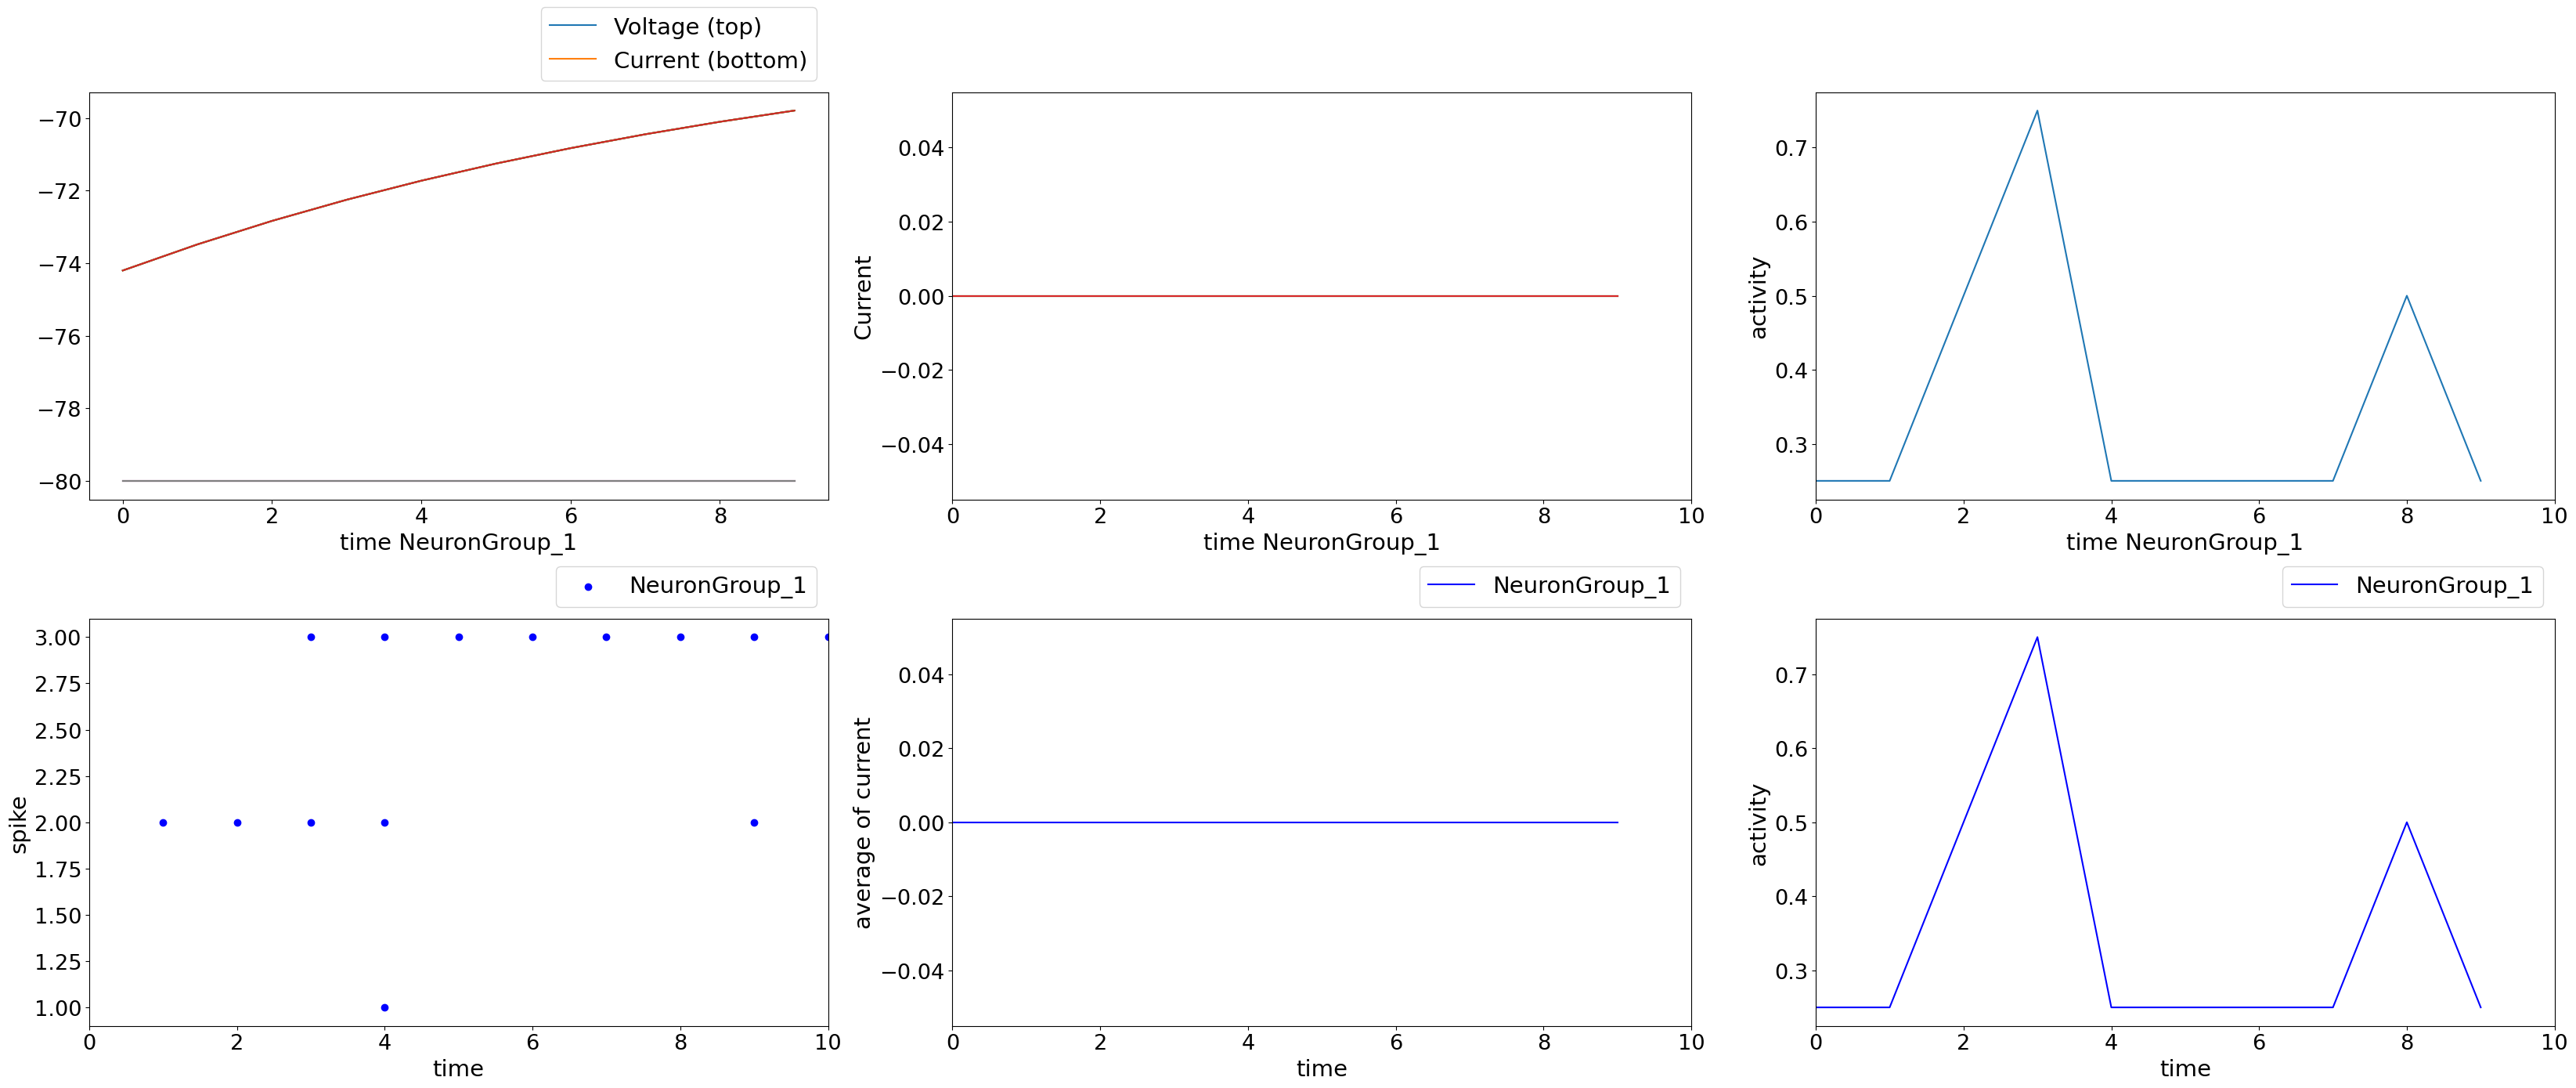

Network['Network_1', 'Network'](Neurons: tensor(4)|1 groups, Synapses: tensor(16)|1 groups){1:Timeresolution(dt=1,)}
NeuronGroup['NeuronGroup_1', 'NeuronGroup', 'ng'](4){4:ConstanceCurrent(current=0,)5:Dandrite()6:LIF(tau=10,R=1.5,u_rest=-67,u_reset=-75,threshold=-55,ratio=1,)7:PoissonDistribution(time=10,data=tensor([[1, 2, 3, 4]]),)8:PopulationActivity()13:Recorder(variables=['u', 'I', 'w', 'T'],gap_width=0,max_length=None,auto_annotate=True,tag=ng1_rec,)14:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng1_even,)}
SynapseGroup['synaps_inside_neurongroup', 'SynapseGroup', 'syn', 'NeuronGroup_1 => NeuronGroup_1'](S4xD4){4:FullConnectivityFirstOption(J0=0,),}

In [11]:
SimulationPoissonDistribution()

Network['Network_1', 'Network'](Neurons: tensor(100)|1 groups, Synapses: tensor(10000)|1 groups){1:Timeresolution(dt=1,)}
NeuronGroup['NeuronGroup_1', 'NeuronGroup', 'ng'](100){4:ConstanceCurrent(current=0,)5:Dandrite()6:LIF(tau=10,R=1.5,u_rest=-67,u_reset=-75,threshold=-55,ratio=1,)7:PoissonDistribution(time=10,data=tensor([[192, 184, 177, 171, 169, 163, 158, 152, 155, 160, 180, 175, 169, 162,
         189, 167, 129, 144, 142, 147, 173, 167, 165, 137,  95, 147, 205, 141,
         136, 140, 169, 162, 160, 157, 175, 205, 204, 134, 128, 125, 159, 158,
         156, 100,  67,  99,  98,  60, 120, 112, 154, 149, 148,  18,  43,  51,
          61,  43, 112,  95, 151, 147, 146,  92, 199,  53,  78,  29,  98,  84,
         150, 148, 144, 156, 180,  52,  68, 105,  84,  81, 148, 147, 146, 152,
          60,  98,  92,  91,  77,  75, 145, 146, 141,  57,  47,  66,  94,  77,
          95,  73]], dtype=torch.uint8),)8:PopulationActivity()13:Recorder(variables=['u', 'I', 'w', 'T'],gap_width=0,max_length

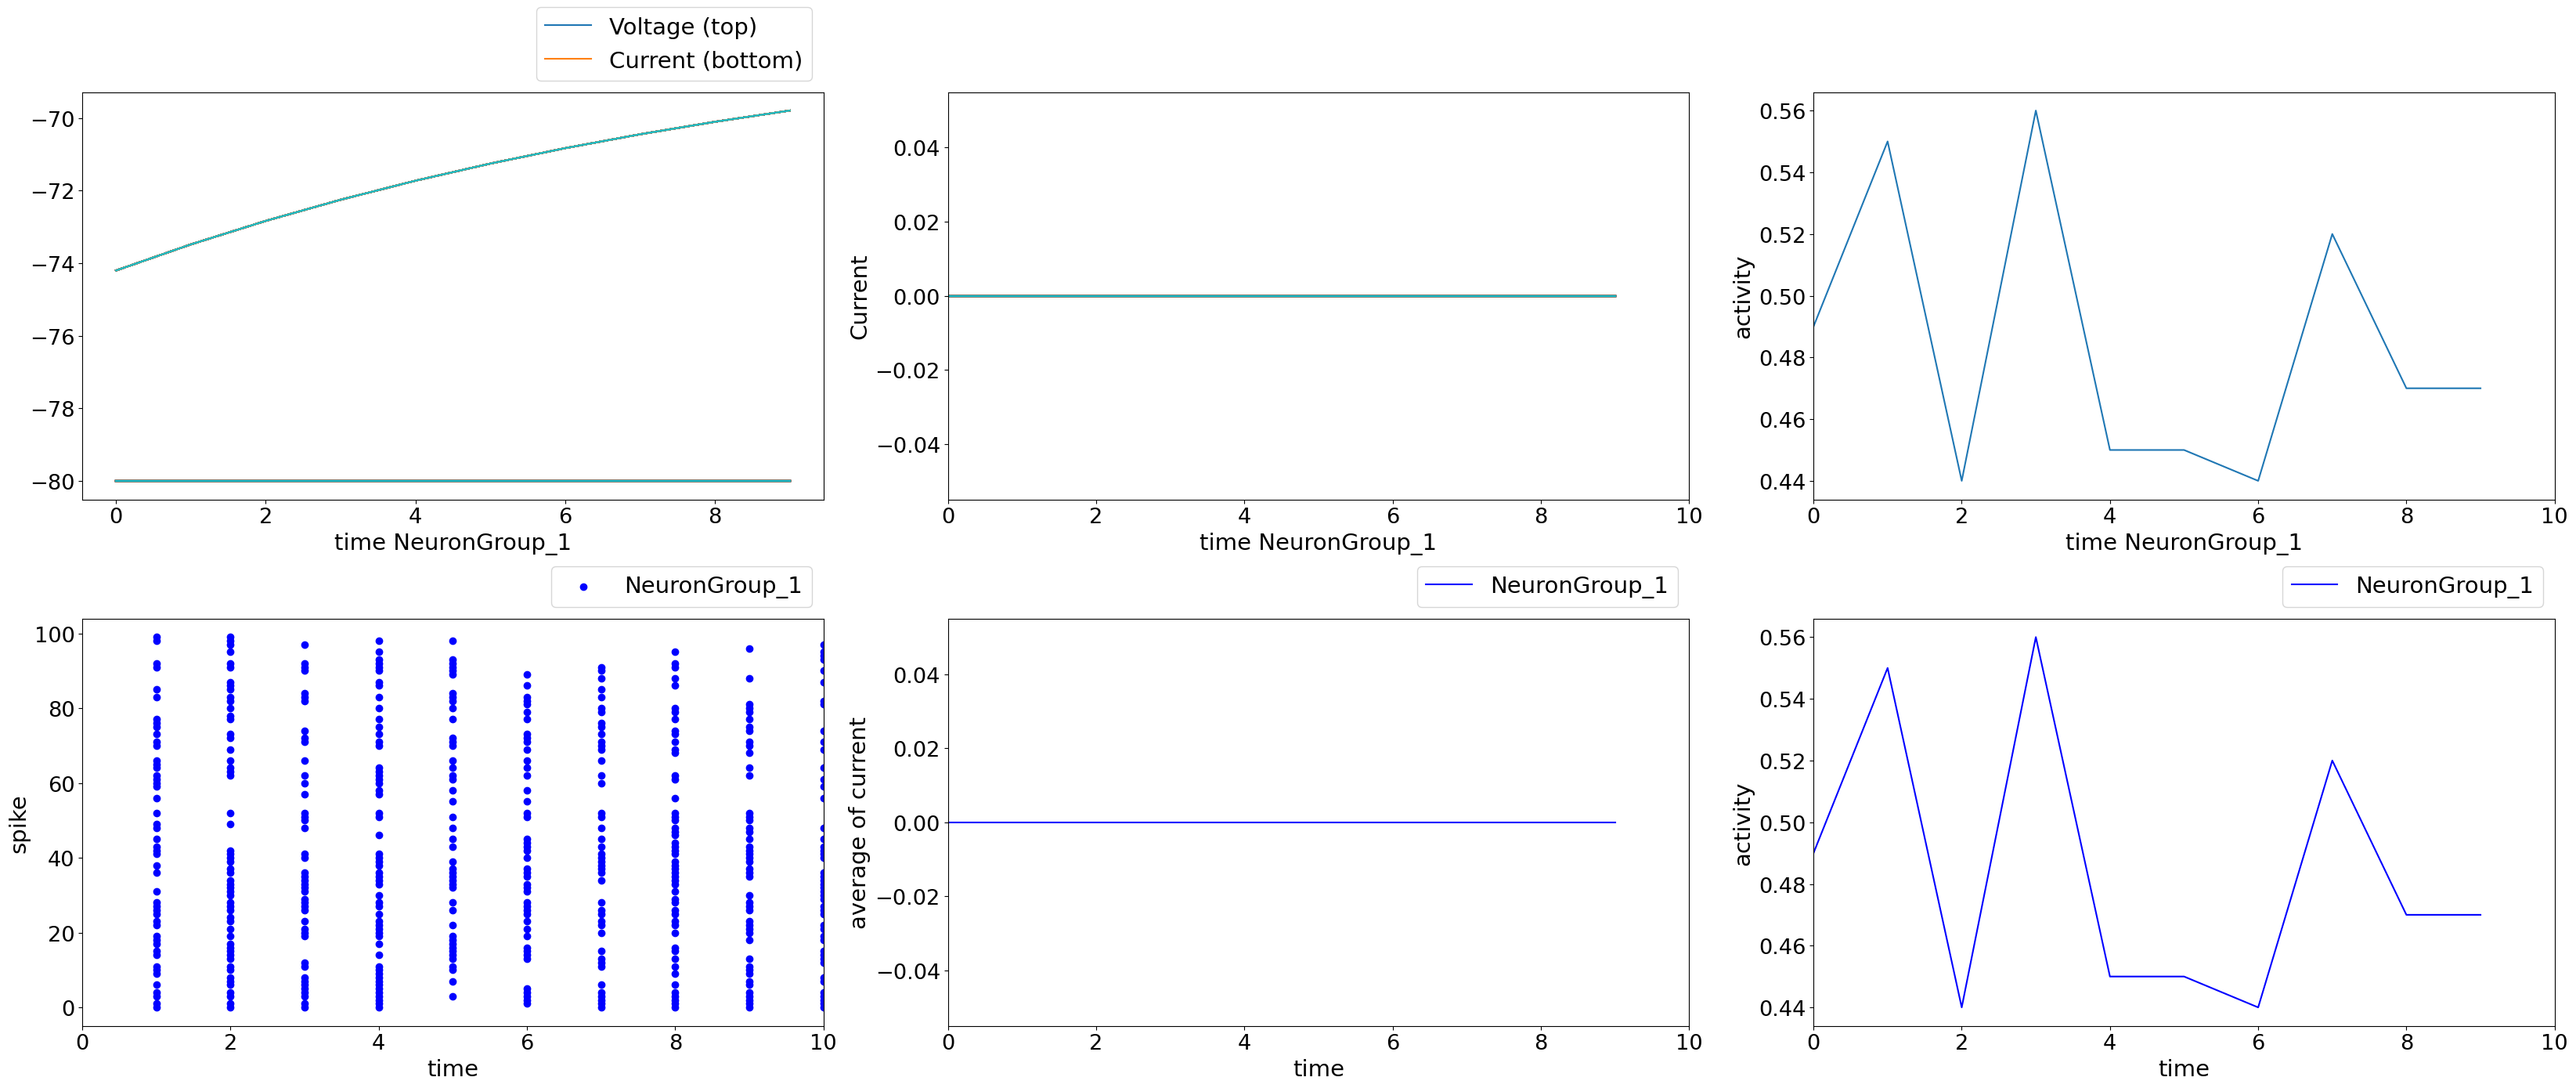

Network['Network_1', 'Network'](Neurons: tensor(100)|1 groups, Synapses: tensor(10000)|1 groups){1:Timeresolution(dt=1,)}
NeuronGroup['NeuronGroup_1', 'NeuronGroup', 'ng'](100){4:ConstanceCurrent(current=0,)5:Dandrite()6:LIF(tau=10,R=1.5,u_rest=-67,u_reset=-75,threshold=-55,ratio=1,)7:PoissonDistribution(time=10,data=tensor([[192, 184, 177, 171, 169, 163, 158, 152, 155, 160, 180, 175, 169, 162,
         189, 167, 129, 144, 142, 147, 173, 167, 165, 137,  95, 147, 205, 141,
         136, 140, 169, 162, 160, 157, 175, 205, 204, 134, 128, 125, 159, 158,
         156, 100,  67,  99,  98,  60, 120, 112, 154, 149, 148,  18,  43,  51,
          61,  43, 112,  95, 151, 147, 146,  92, 199,  53,  78,  29,  98,  84,
         150, 148, 144, 156, 180,  52,  68, 105,  84,  81, 148, 147, 146, 152,
          60,  98,  92,  91,  77,  75, 145, 146, 141,  57,  47,  66,  94,  77,
          95,  73]], dtype=torch.uint8),)8:PopulationActivity()13:Recorder(variables=['u', 'I', 'w', 'T'],gap_width=0,max_length

In [12]:
SimulationPoissonDistribution(model=LIF(tau=10,
                    R=1.5,
                    u_rest=-67,
                    u_reset=-75,
                    threshold=-55,
                    ratio=1), 
            current=ConstanceCurrent(current=0), 
            dt = 1, 
            PLT = True,
            iteration_num = 10,
            connection_pattern = FullConnectivityFirstOption(J0=0), 
            input_data = data3,
            input_time = 10
            )

Network['Network_1', 'Network'](Neurons: tensor(100)|1 groups, Synapses: tensor(10000)|1 groups){1:Timeresolution(dt=1,)}
NeuronGroup['NeuronGroup_1', 'NeuronGroup', 'ng'](100){4:ConstanceCurrent(current=0,)5:Dandrite()6:LIF(tau=10,R=1.5,u_rest=-67,u_reset=-75,threshold=-55,ratio=1,)7:PoissonDistribution(time=5,data=tensor([[192, 184, 177, 171, 169, 163, 158, 152, 155, 160, 180, 175, 169, 162,
         189, 167, 129, 144, 142, 147, 173, 167, 165, 137,  95, 147, 205, 141,
         136, 140, 169, 162, 160, 157, 175, 205, 204, 134, 128, 125, 159, 158,
         156, 100,  67,  99,  98,  60, 120, 112, 154, 149, 148,  18,  43,  51,
          61,  43, 112,  95, 151, 147, 146,  92, 199,  53,  78,  29,  98,  84,
         150, 148, 144, 156, 180,  52,  68, 105,  84,  81, 148, 147, 146, 152,
          60,  98,  92,  91,  77,  75, 145, 146, 141,  57,  47,  66,  94,  77,
          95,  73]], dtype=torch.uint8),)8:PopulationActivity()13:Recorder(variables=['u', 'I', 'w', 'T'],gap_width=0,max_length=

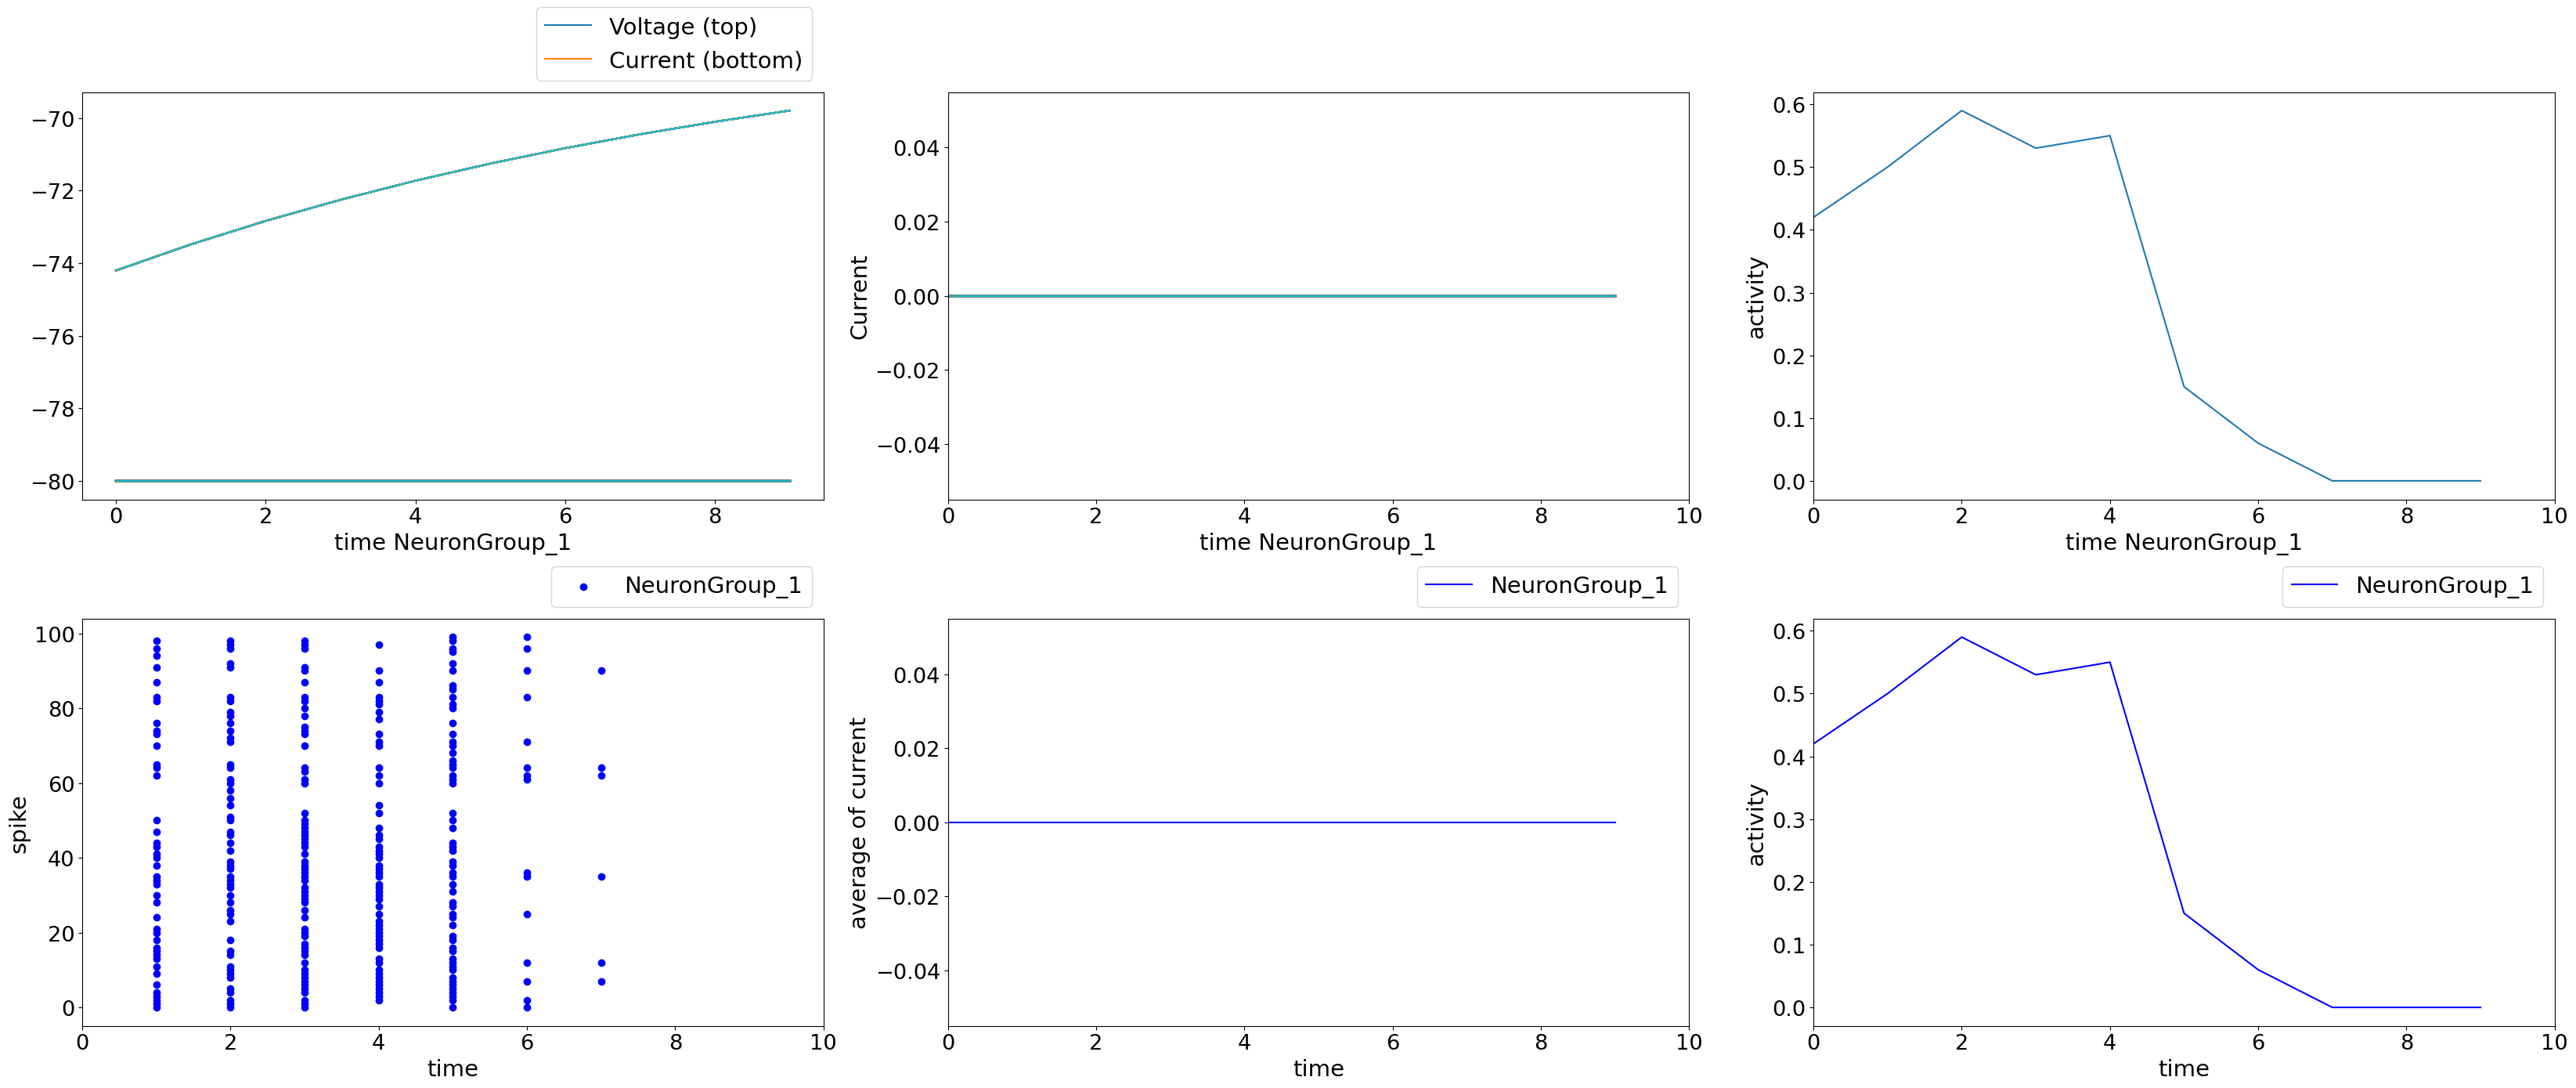

Network['Network_1', 'Network'](Neurons: tensor(100)|1 groups, Synapses: tensor(10000)|1 groups){1:Timeresolution(dt=1,)}
NeuronGroup['NeuronGroup_1', 'NeuronGroup', 'ng'](100){4:ConstanceCurrent(current=0,)5:Dandrite()6:LIF(tau=10,R=1.5,u_rest=-67,u_reset=-75,threshold=-55,ratio=1,)7:PoissonDistribution(time=5,data=tensor([[192, 184, 177, 171, 169, 163, 158, 152, 155, 160, 180, 175, 169, 162,
         189, 167, 129, 144, 142, 147, 173, 167, 165, 137,  95, 147, 205, 141,
         136, 140, 169, 162, 160, 157, 175, 205, 204, 134, 128, 125, 159, 158,
         156, 100,  67,  99,  98,  60, 120, 112, 154, 149, 148,  18,  43,  51,
          61,  43, 112,  95, 151, 147, 146,  92, 199,  53,  78,  29,  98,  84,
         150, 148, 144, 156, 180,  52,  68, 105,  84,  81, 148, 147, 146, 152,
          60,  98,  92,  91,  77,  75, 145, 146, 141,  57,  47,  66,  94,  77,
          95,  73]], dtype=torch.uint8),)8:PopulationActivity()13:Recorder(variables=['u', 'I', 'w', 'T'],gap_width=0,max_length=

In [13]:
SimulationPoissonDistribution(model=LIF(tau=10,
                    R=1.5,
                    u_rest=-67,
                    u_reset=-75,
                    threshold=-55,
                    ratio=1), 
            current=ConstanceCurrent(current=0), 
            dt = 1, 
            PLT = True,
            iteration_num = 10,
            connection_pattern = FullConnectivityFirstOption(J0=0), 
            input_data = data3,
            input_time = 5
            )

In [16]:
def SimulationLinear(model=LIF(tau=10,
                    R=1.5,
                    u_rest=-67,
                    u_reset=-75,
                    threshold=-55,
                    ratio=1), 
            current=ConstanceCurrent(current=0), 
            dt = 1, 
            PLT = True,
            iteration_num = 10,
            connection_pattern = FullConnectivityFirstOption(J0=0), 
            input_data = 4.7,
            input_time = 10
            ):
    
        size = 10
                        
        net1 = pmt.Network(behavior = {1: Timeresolution(dt = dt)} )
        
        pop1 = pmt.NeuronGroup(size = size,
                                net = net1,
                                behavior = {
                                        4 : current,
                                        5 : Dandrite(),
                                        6 : model,
                                        7 : NumericalCoding(time = input_time, data=input_data),
                                        8 : PopulationActivity(),
                                        13 : pmt.Recorder(variables=["u","I","w","T"],tag="ng1_rec"),
                                        14 : pmt.EventRecorder( variables=["spike"],tag="ng1_even"),
                                        })
        
        syn_inside_ng = pmt.SynapseGroup(tag="synaps_inside_neurongroup",
                                        net= net1,
                                        src= pop1,
                                        dst= pop1,
                                        behavior={4: connection_pattern})
        
        net1.initialize()
        net1.simulate_iterations(iteration_num)
 
        if PLT: print_plot(net1,ngs=[pop1])

        
        return net1

Network['Network_1', 'Network'](Neurons: tensor(10)|1 groups, Synapses: tensor(100)|1 groups){1:Timeresolution(dt=1,)}
NeuronGroup['NeuronGroup_1', 'NeuronGroup', 'ng'](10){4:ConstanceCurrent(current=0,)5:Dandrite()6:LIF(tau=10,R=1.5,u_rest=-67,u_reset=-75,threshold=-55,ratio=1,)7:NumericalCoding(time=10,data=4.7,)8:PopulationActivity()13:Recorder(variables=['u', 'I', 'w', 'T'],gap_width=0,max_length=None,auto_annotate=True,tag=ng1_rec,)14:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng1_even,)}
SynapseGroup['synaps_inside_neurongroup', 'SynapseGroup', 'syn', 'NeuronGroup_1 => NeuronGroup_1'](S10xD10){4:FullConnectivityFirstOption(J0=0,),}
tensor([[False, False, False, False,  True, False, False, False, False, False],
        [False, False, False,  True, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False, 

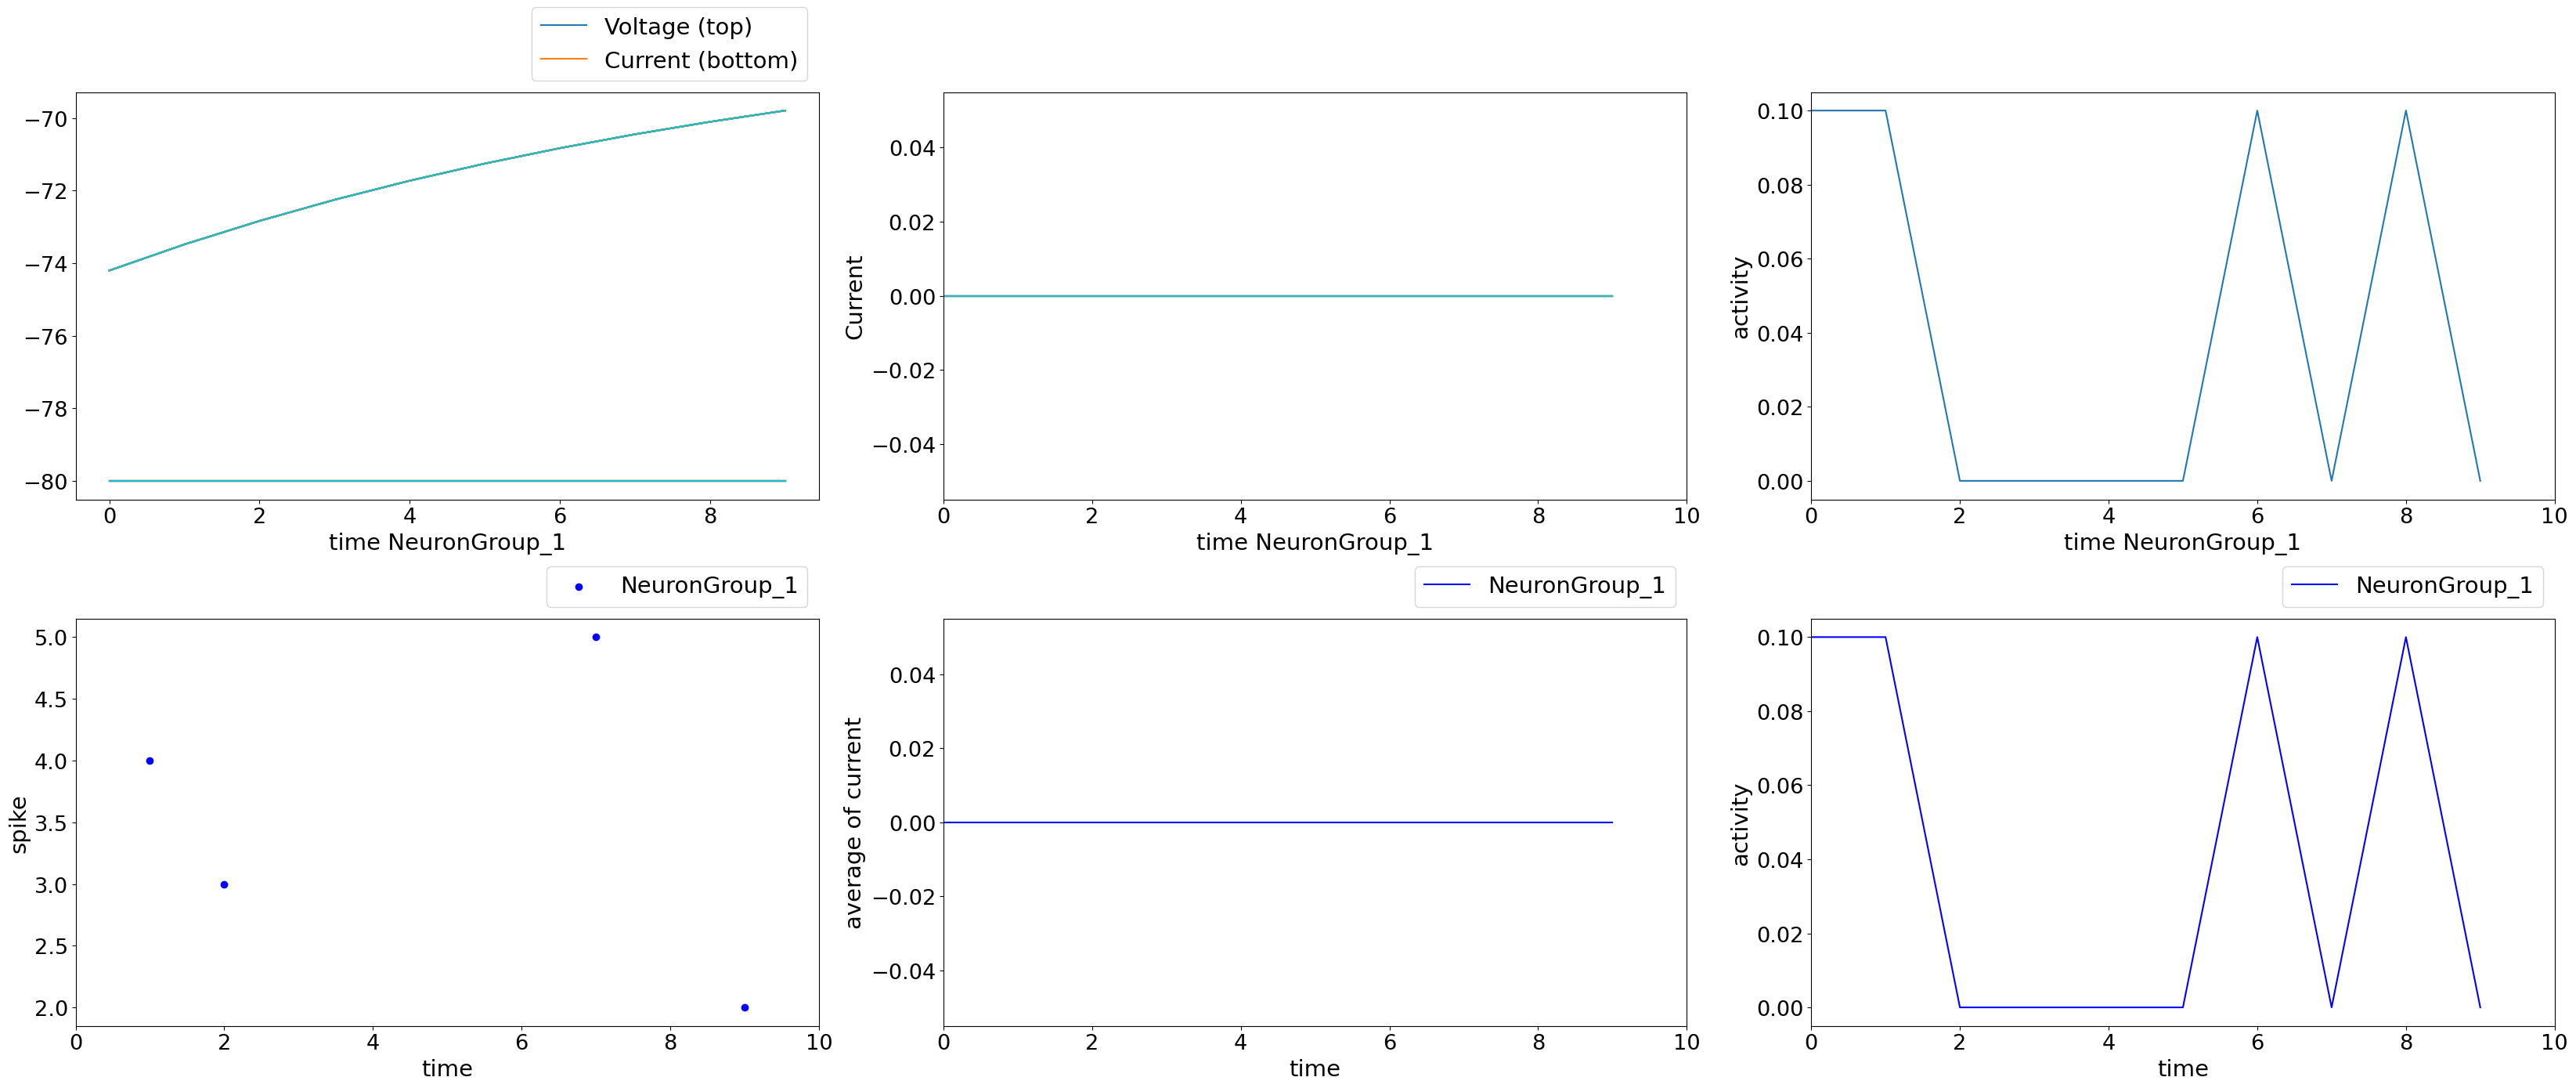

Network['Network_1', 'Network'](Neurons: tensor(10)|1 groups, Synapses: tensor(100)|1 groups){1:Timeresolution(dt=1,)}
NeuronGroup['NeuronGroup_1', 'NeuronGroup', 'ng'](10){4:ConstanceCurrent(current=0,)5:Dandrite()6:LIF(tau=10,R=1.5,u_rest=-67,u_reset=-75,threshold=-55,ratio=1,)7:NumericalCoding(time=10,data=4.7,)8:PopulationActivity()13:Recorder(variables=['u', 'I', 'w', 'T'],gap_width=0,max_length=None,auto_annotate=True,tag=ng1_rec,)14:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng1_even,)}
SynapseGroup['synaps_inside_neurongroup', 'SynapseGroup', 'syn', 'NeuronGroup_1 => NeuronGroup_1'](S10xD10){4:FullConnectivityFirstOption(J0=0,),}

In [17]:
SimulationLinear()

Network['Network_1', 'Network'](Neurons: tensor(10)|1 groups, Synapses: tensor(100)|1 groups){1:Timeresolution(dt=1,)}
NeuronGroup['NeuronGroup_1', 'NeuronGroup', 'ng'](10){4:ConstanceCurrent(current=0,)5:Dandrite()6:LIF(tau=10,R=1.5,u_rest=-67,u_reset=-75,threshold=-55,ratio=1,)7:NumericalCoding(time=10,data=4,)8:PopulationActivity()13:Recorder(variables=['u', 'I', 'w', 'T'],gap_width=0,max_length=None,auto_annotate=True,tag=ng1_rec,)14:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng1_even,)}
SynapseGroup['synaps_inside_neurongroup', 'SynapseGroup', 'syn', 'NeuronGroup_1 => NeuronGroup_1'](S10xD10){4:FullConnectivityFirstOption(J0=0,),}
tensor([[False, False, False,  True, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False, Fa

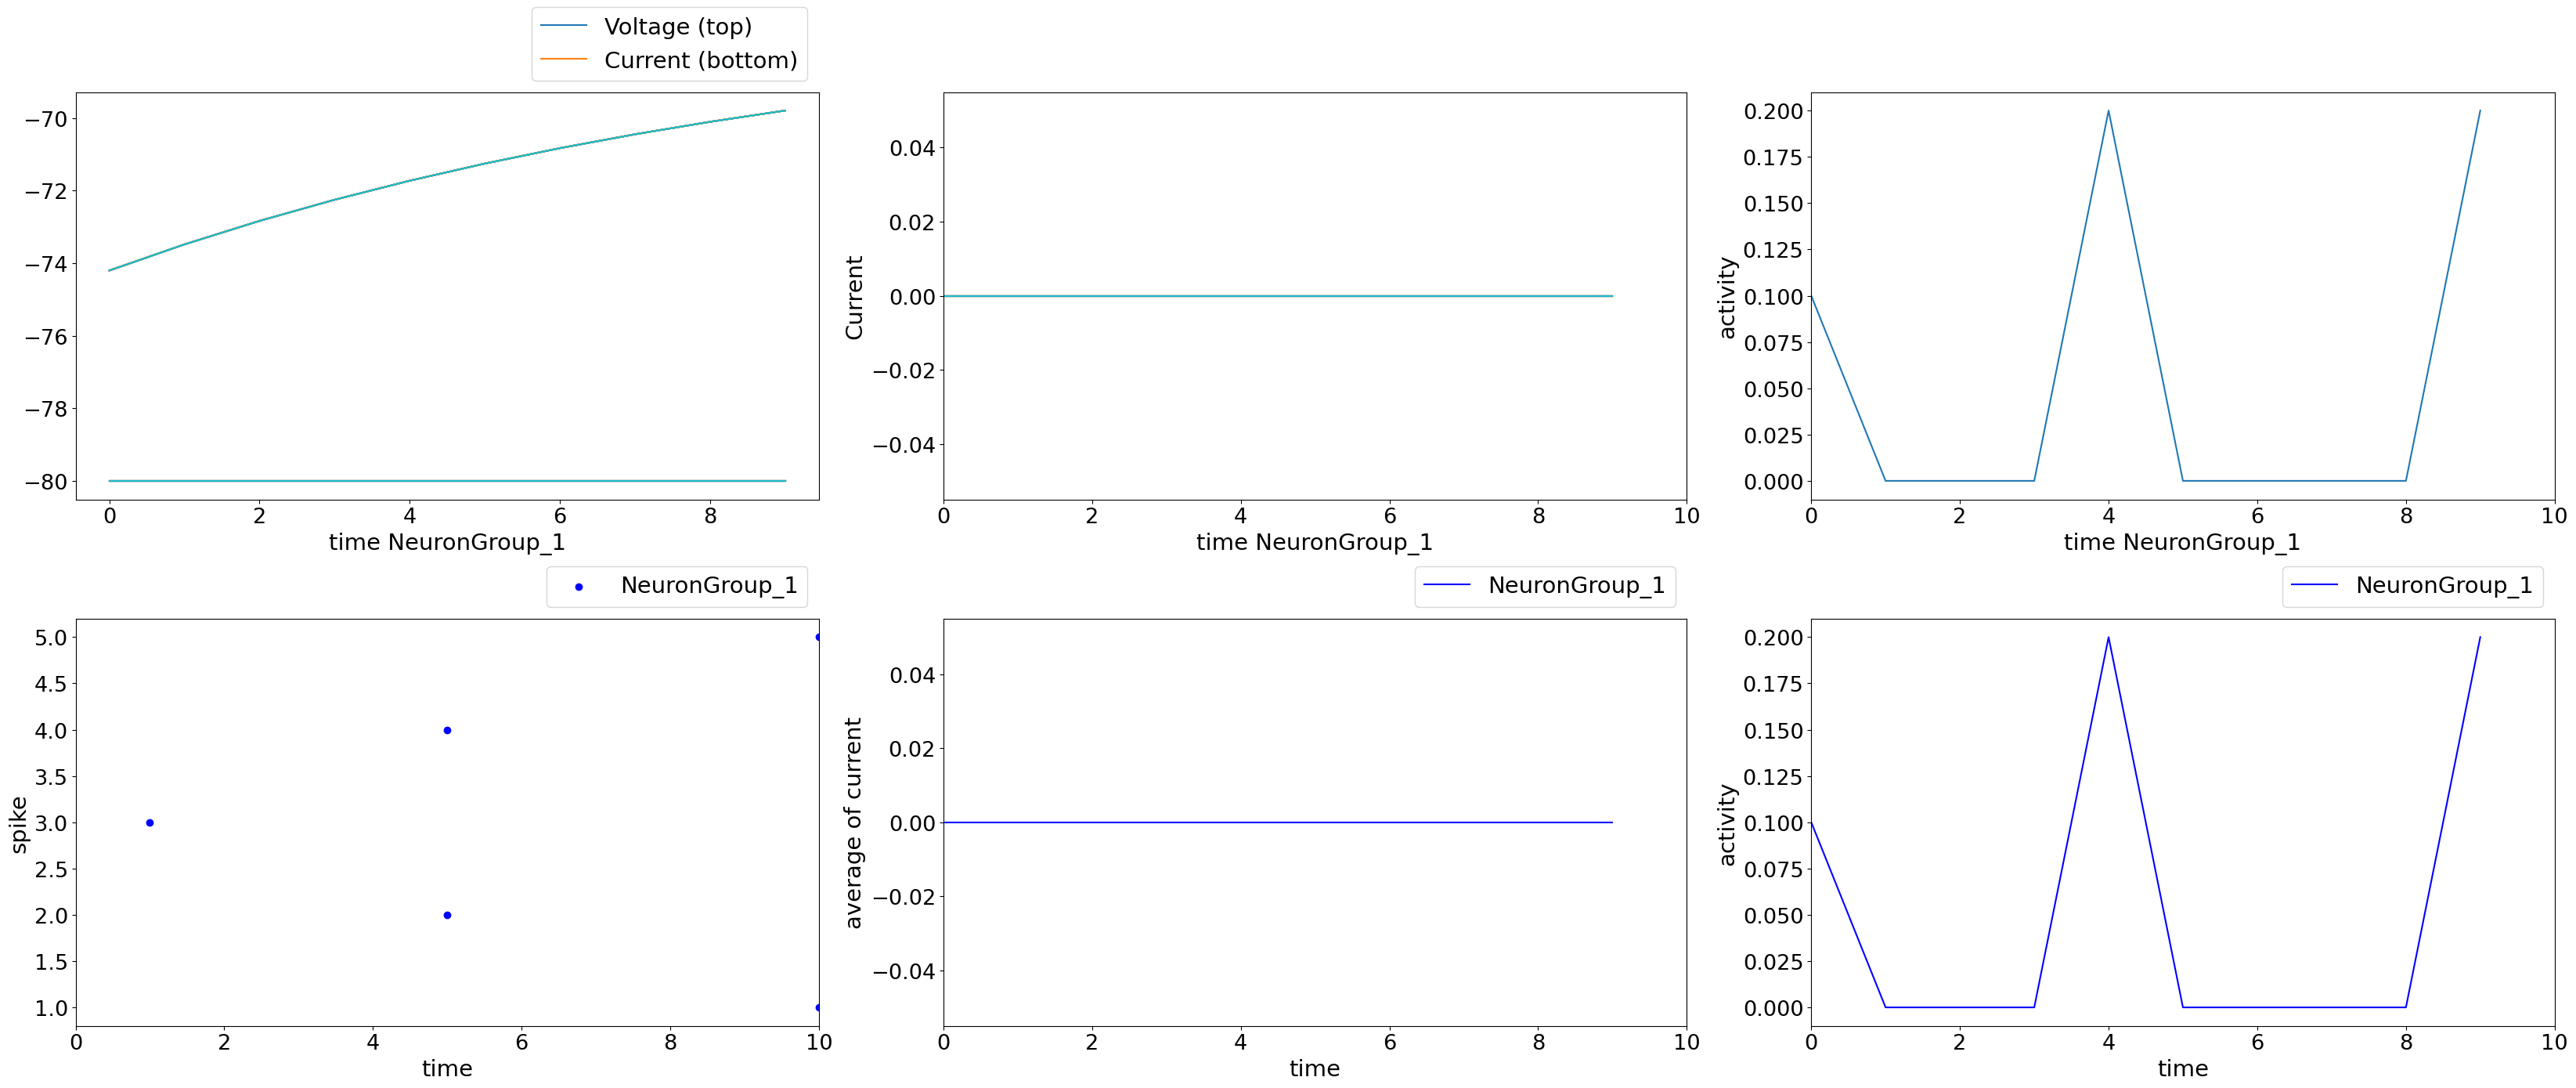

Network['Network_1', 'Network'](Neurons: tensor(10)|1 groups, Synapses: tensor(100)|1 groups){1:Timeresolution(dt=1,)}
NeuronGroup['NeuronGroup_1', 'NeuronGroup', 'ng'](10){4:ConstanceCurrent(current=0,)5:Dandrite()6:LIF(tau=10,R=1.5,u_rest=-67,u_reset=-75,threshold=-55,ratio=1,)7:NumericalCoding(time=10,data=4,)8:PopulationActivity()13:Recorder(variables=['u', 'I', 'w', 'T'],gap_width=0,max_length=None,auto_annotate=True,tag=ng1_rec,)14:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng1_even,)}
SynapseGroup['synaps_inside_neurongroup', 'SynapseGroup', 'syn', 'NeuronGroup_1 => NeuronGroup_1'](S10xD10){4:FullConnectivityFirstOption(J0=0,),}

In [20]:
SimulationLinear(model=LIF(tau=10,
                    R=1.5,
                    u_rest=-67,
                    u_reset=-75,
                    threshold=-55,
                    ratio=1), 
            current=ConstanceCurrent(current=0), 
            dt = 1, 
            PLT = True,
            iteration_num = 10,
            connection_pattern = FullConnectivityFirstOption(J0=0), 
            input_data = 4,
            input_time = 10
            )